In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import cv2
import tensorflow_addons as tfa

In [328]:
train = keras.preprocessing.image_dataset_from_directory('dataset/train',color_mode= "grayscale",batch_size=32,
                                                          label_mode='categorical',image_size=(100,100),subset=
                                                          "training",seed=41,validation_split=0.1,shuffle=False)

validation = keras.preprocessing.image_dataset_from_directory('dataset/train',color_mode= "grayscale",batch_size=32,
                                                          label_mode='categorical',image_size=(100,100),subset=
                                                          "validation",seed=41,validation_split=0.1,shuffle=False)

test = keras.preprocessing.image_dataset_from_directory('dataset/test',color_mode= "grayscale",batch_size=32,
                                                          label_mode='categorical',image_size=(100,100),shuffle=False)

Found 1944 files belonging to 4 classes.
Using 1750 files for training.
Found 1944 files belonging to 4 classes.
Using 194 files for validation.
Found 830 files belonging to 4 classes.


In [329]:
x_train = np.concatenate([x for x, y in train], axis=0)
y_train = np.concatenate([y for x, y in train], axis=0)
x_valid = np.concatenate([x for x, y in validation], axis=0)
y_valid = np.concatenate([y for x, y in validation], axis=0)
x_test = np.concatenate([x for x, y in test], axis=0)
y_test = np.concatenate([y for x, y in test], axis=0)

In [4]:
bald_eagle=len(glob.glob('dataset/train/bald_eagle/*')) 
elk=len(glob.glob('dataset/train/elk/*'))
racoon=len(glob.glob('dataset/train/racoon/*'))
raven=len(glob.glob('dataset/train/raven/*'))

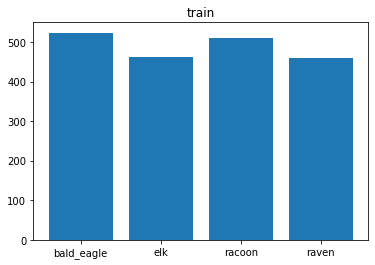

In [5]:
plt.bar(["bald_eagle","elk","racoon","raven"],[bald_eagle,elk,racoon,raven])
plt.title("train");

In [6]:
bald_eagle=len(glob.glob('dataset/test/bald_eagle/*')) 
elk=len(glob.glob('dataset/test/elk/*'))
racoon=len(glob.glob('dataset/test/racoon/*'))
raven=len(glob.glob('dataset/test/raven/*'))

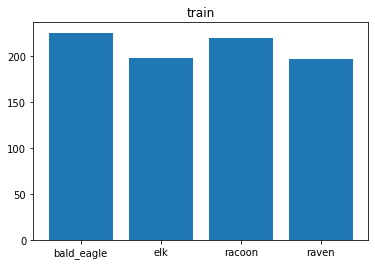

In [7]:
plt.bar(["bald_eagle","elk","racoon","raven"],[bald_eagle,elk,racoon,raven])
plt.title("train");

racoon


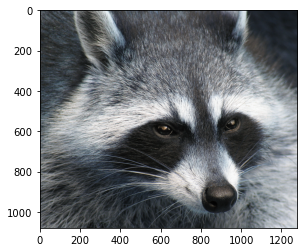

In [10]:
path = ["dataset/test/racoon/*.jpg"]
images = glob.glob(random.choice(path))
random_image = random.choice(images)
plt.imshow(cv2.imread(random_image));
print(path[0].split("/")[2])

raven


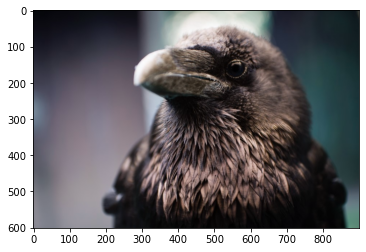

In [13]:
path = ["dataset/test/raven/*.jpg"]
images = glob.glob(random.choice(path))
random_image = random.choice(images)
plt.imshow(cv2.imread(random_image));
print(path[0].split("/")[2])

bald_eagle


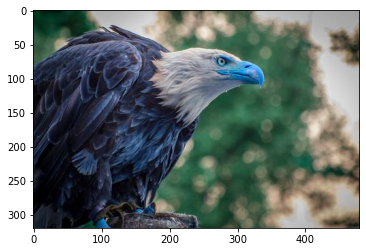

In [42]:
path = ["dataset/test/bald_eagle/*.jpg"]
images = glob.glob(random.choice(path))
random_image = random.choice(images)
plt.imshow(cv2.imread(random_image));
print(path[0].split("/")[2])

elk


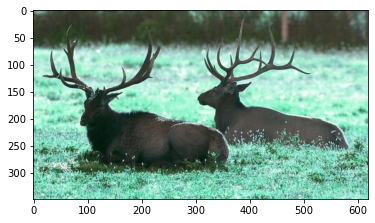

In [64]:
path = ["dataset/test/elk/*.jpg"]
images = glob.glob(random.choice(path))
random_image = random.choice(images)
plt.imshow(cv2.imread(random_image));
print(path[0].split("/")[2])

<Figure size 432x288 with 0 Axes>

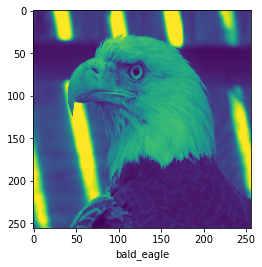

<Figure size 432x288 with 0 Axes>

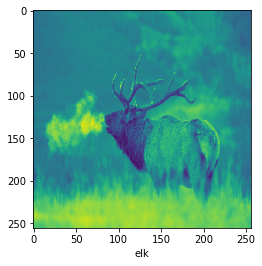

<Figure size 432x288 with 0 Axes>

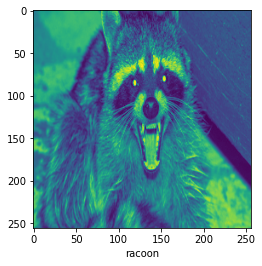

<Figure size 432x288 with 0 Axes>

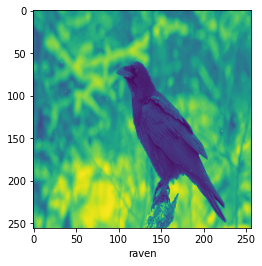

In [17]:
i = 0
for images, labels in train:
    if i == 4:
        break
    for image, label in zip(images, labels):
        if i == 4:
            break
        if label[i] == 1:
            plt.figure();
            fig, ax = plt.subplots();
            plt.xlabel(((glob.glob('dataset/train/*')[i]).split("/")[1]).split('\\')[1]);
            plt.imshow(image);
            i += 1

In [330]:
inputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)
output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1')(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2')(output)
output = keras.layers.Dense(4, activation = "softmax")(output)
model = keras.models.Model(inputs=inputs, outputs = output)

In [331]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",
              metrics=['Accuracy', 'Precision', 'Recall',tfa.metrics.F1Score(num_classes=4)])

hist = model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_valid, y_valid));

Epoch 1/10
55/55 [==============================] - 3s 46ms/step - loss: 1.3998 - Accuracy: 0.3526 - precision: 0.3743 - recall: 0.0800 - f1_score: 0.3379 - val_loss: 2.2519 - val_Accuracy: 0.0258 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0126
Epoch 2/10
55/55 [==============================] - 2s 45ms/step - loss: 1.1996 - Accuracy: 0.4617 - precision: 0.5819 - recall: 0.1360 - f1_score: 0.4530 - val_loss: 0.8349 - val_Accuracy: 0.7371 - val_precision: 0.9894 - val_recall: 0.4794 - val_f1_score: 0.2122
Epoch 3/10
55/55 [==============================] - 2s 40ms/step - loss: 1.1234 - Accuracy: 0.5217 - precision: 0.6732 - recall: 0.2154 - f1_score: 0.5136 - val_loss: 1.5658 - val_Accuracy: 0.3608 - val_precision: 0.6304 - val_recall: 0.1495 - val_f1_score: 0.1326
Epoch 4/10
55/55 [==============================] - 2s 45ms/step - loss: 1.0782 - Accuracy: 0.5303 - precision: 0.6801 - recall: 0.2600 - f1_score: 0.5258 - val_loss: 1.5303 - val_Accuracy: 0.3866 

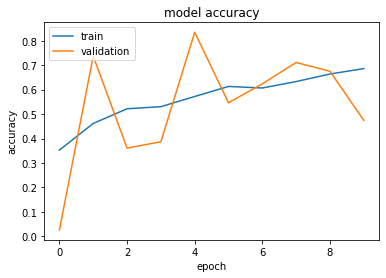

In [332]:
plt.plot(hist.history['Accuracy'])
plt.plot(hist.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

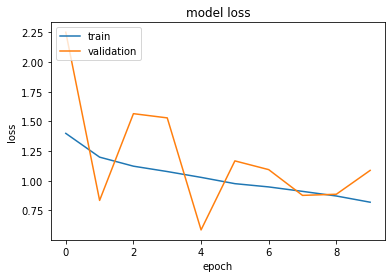

In [333]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [334]:
model.summary()

Model: "model_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 100, 100, 1)]     0         
                                                                 
 rescaling_79 (Rescaling)    (None, 100, 100, 1)       0         
                                                                 
 flatten_72 (Flatten)        (None, 10000)             0         
                                                                 
 Hidden-Layer1 (Dense)       (None, 1024)              10241024  
                                                                 
 Hidden-Layer2 (Dense)       (None, 512)               524800    
                                                                 
 dense_91 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 10,767,876
Trainable params: 10,767,876
Non-

## Momentum
Momentum or SGD with momentum is a method which helps accelerate gradients vectors in the right directions, thus leading to faster converging in compare to stochastic gradient descent. A momentum, is a moving average of our gradients. We then use it to update the weight of the network. Here is how the weights are updated using momentum:

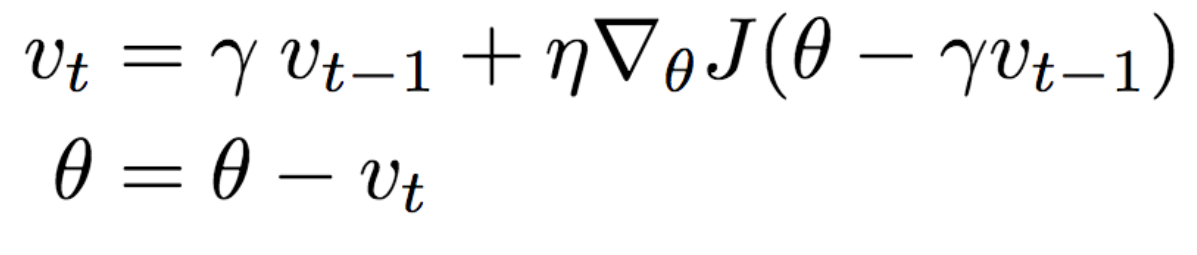

It considers the amount of weight increment in the previous iteration as well. Thus, if the optimization algorithm is moving in a general direction, the momentum causes it to ‘resist’ changes in direction.

A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step

## why is it usefull?

1) The momentum algorithm accumulates an exponentially decaying moving average of past gradients and continues to move in their direction.

2) Momentum has the effect of dampening down the change in the gradient and, in turn, the step size with each new point in the search space.

3) Momentum can increase speed when the cost surface is highly nonspherical because it damps the size of the steps along directions of high curvature thus yielding a larger effective learning rate along the directions of low curvature.

4) Momentum is most useful in optimization problems where the objective function has a large amount of curvature (e.g. changes a lot), meaning that the gradient may change a lot over relatively small regions of the search space.

5) The method of momentum is designed to accelerate learning, especially in the face of high curvature, small but consistent gradients, or noisy gradients.

6) It is also helpful when the gradient is estimated, such as from a simulation, and may be noisy, e.g. when the gradient has a high variance.

7) Finally, momentum is helpful when the search space is flat or nearly flat, e.g. zero gradient. The momentum allows the search to progress in the same direction as before the flat spot and helpfully cross the flat region.

## Momentum = 0.5

In [358]:
inputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)
output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1')(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2')(output)
output = keras.layers.Dense(4, activation = "softmax")(output)
model = keras.models.Model(inputs=inputs, outputs = output)
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.5),
              loss = "categorical_crossentropy", metrics = ['Accuracy', 'Precision', 'Recall'])
hist = model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_valid, y_valid));

Epoch 1/10
55/55 [==============================] - 3s 53ms/step - loss: 1.3252 - Accuracy: 0.3880 - precision: 0.4602 - recall: 0.1354 - val_loss: 1.9230 - val_Accuracy: 0.1907 - val_precision: 0.2222 - val_recall: 0.0309
Epoch 2/10
55/55 [==============================] - 3s 48ms/step - loss: 1.1643 - Accuracy: 0.4777 - precision: 0.6106 - recall: 0.2034 - val_loss: 0.8949 - val_Accuracy: 0.6959 - val_precision: 0.9109 - val_recall: 0.4742
Epoch 3/10
55/55 [==============================] - 3s 48ms/step - loss: 1.0784 - Accuracy: 0.5354 - precision: 0.6525 - recall: 0.2800 - val_loss: 1.0327 - val_Accuracy: 0.5876 - val_precision: 0.7957 - val_recall: 0.3814
Epoch 4/10
55/55 [==============================] - 3s 48ms/step - loss: 1.0132 - Accuracy: 0.5703 - precision: 0.7102 - recall: 0.3514 - val_loss: 0.9784 - val_Accuracy: 0.6495 - val_precision: 0.8151 - val_recall: 0.5000
Epoch 5/10
55/55 [==============================] - 3s 48ms/step - loss: 0.9560 - Accuracy: 0.6006 - precisi

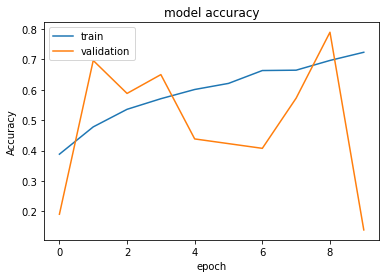

In [359]:
plt.plot(hist.history['Accuracy'])
plt.plot(hist.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

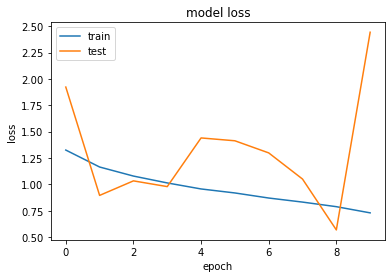

In [360]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### As it can be seen, with momentum = 0.5 we have a faster convergence in compare to the momentum = 0 case
## Momentum = 0.9

In [349]:
nputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)
output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1')(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2')(output)
output = keras.layers.Dense(4, activation = "softmax")(output)
model = keras.models.Model(inputs=inputs, outputs = output)
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9),
              loss = "categorical_crossentropy", metrics = ['Accuracy', 'Precision', 'Recall'])
hist = model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_valid, y_valid));

Epoch 1/10
55/55 [==============================] - 4s 64ms/step - loss: 1.3975 - Accuracy: 0.3469 - precision: 0.4107 - recall: 0.1143 - val_loss: 1.8889 - val_Accuracy: 0.0825 - val_precision: 0.1739 - val_recall: 0.0412
Epoch 2/10
55/55 [==============================] - 3s 53ms/step - loss: 1.1701 - Accuracy: 0.4451 - precision: 0.6165 - recall: 0.1966 - val_loss: 1.4474 - val_Accuracy: 0.3196 - val_precision: 0.5484 - val_recall: 0.2629
Epoch 3/10
55/55 [==============================] - 3s 52ms/step - loss: 1.0996 - Accuracy: 0.4926 - precision: 0.6181 - recall: 0.2766 - val_loss: 0.8561 - val_Accuracy: 0.7474 - val_precision: 0.8702 - val_recall: 0.5876
Epoch 4/10
55/55 [==============================] - 3s 63ms/step - loss: 1.1076 - Accuracy: 0.4966 - precision: 0.6197 - recall: 0.2914 - val_loss: 1.5618 - val_Accuracy: 0.3454 - val_precision: 0.7719 - val_recall: 0.2268
Epoch 5/10
55/55 [==============================] - 4s 79ms/step - loss: 1.0689 - Accuracy: 0.5211 - precisi

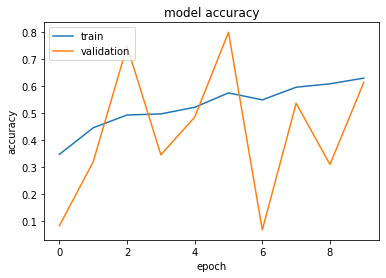

In [350]:
plt.plot(hist.history['Accuracy'])
plt.plot(hist.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

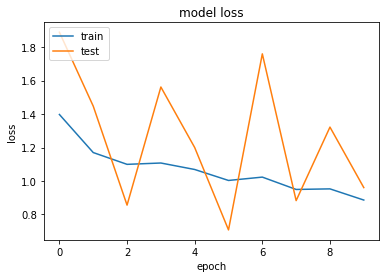

In [351]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### The momentum factor is too large and it is skipping the minimum point with huge steps. Therefore, it is giving worse results in compare to the momentum = 0.5 case

## Adam optimizer

In [361]:
inputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)
output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1')(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2')(output)
output = keras.layers.Dense(4, activation = "softmax")(output)
model = keras.models.Model(inputs = inputs, outputs = output)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = 
              ['Accuracy', 'Precision', 'Recall'])
hist = model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_valid, y_valid));

Epoch 1/10
55/55 [==============================] - 4s 66ms/step - loss: 3.1671 - Accuracy: 0.3320 - precision: 0.3342 - recall: 0.2120 - val_loss: 2.4694 - val_Accuracy: 0.0670 - val_precision: 0.0726 - val_recall: 0.0464
Epoch 2/10
55/55 [==============================] - 3s 60ms/step - loss: 1.2907 - Accuracy: 0.4406 - precision: 0.5043 - recall: 0.2360 - val_loss: 1.0176 - val_Accuracy: 0.6598 - val_precision: 0.9158 - val_recall: 0.4485
Epoch 3/10
55/55 [==============================] - 3s 59ms/step - loss: 1.2284 - Accuracy: 0.4669 - precision: 0.5501 - recall: 0.3074 - val_loss: 1.3635 - val_Accuracy: 0.4536 - val_precision: 0.7531 - val_recall: 0.3144
Epoch 4/10
55/55 [==============================] - 3s 59ms/step - loss: 1.0661 - Accuracy: 0.5326 - precision: 0.6606 - recall: 0.3326 - val_loss: 1.9362 - val_Accuracy: 0.2010 - val_precision: 0.2676 - val_recall: 0.0979
Epoch 5/10
55/55 [==============================] - 3s 59ms/step - loss: 1.0732 - Accuracy: 0.5229 - precisi

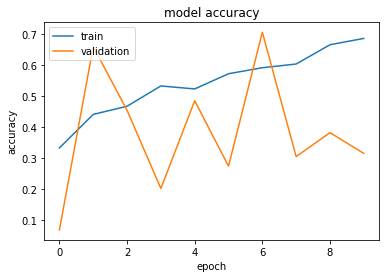

In [362]:
plt.plot(hist.history['Accuracy'])
plt.plot(hist.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

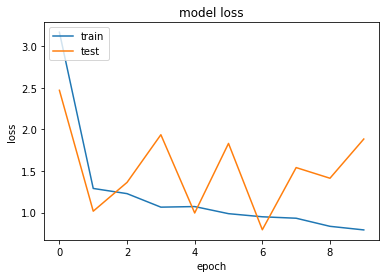

In [363]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The Adam optimizer isn't resulting as well as the SGD Momentum optimizer.

## Epochs

In [355]:
inputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)
output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1')(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2')(output)
output = keras.layers.Dense(4, activation = "softmax")(output)
model = keras.models.Model(inputs = inputs, outputs = output)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = 
              ['Accuracy', 'Precision', 'Recall'])
hist = model.fit(x_train, y_train,batch_size=32,epochs=20,validation_data=(x_valid, y_valid));

Epoch 1/20
55/55 [==============================] - 5s 79ms/step - loss: 4.5220 - Accuracy: 0.3251 - precision: 0.3276 - recall: 0.2183 - val_loss: 1.6624 - val_Accuracy: 0.0979 - val_precision: 0.0764 - val_recall: 0.0619
Epoch 2/20
55/55 [==============================] - 5s 82ms/step - loss: 1.2770 - Accuracy: 0.3931 - precision: 0.4828 - recall: 0.2080 - val_loss: 2.3417 - val_Accuracy: 0.0567 - val_precision: 0.0441 - val_recall: 0.0155
Epoch 3/20
55/55 [==============================] - 4s 67ms/step - loss: 1.2005 - Accuracy: 0.4349 - precision: 0.5626 - recall: 0.2337 - val_loss: 0.8014 - val_Accuracy: 0.6392 - val_precision: 0.7171 - val_recall: 0.5619
Epoch 4/20
55/55 [==============================] - 4s 67ms/step - loss: 1.1736 - Accuracy: 0.4640 - precision: 0.5833 - recall: 0.2440 - val_loss: 2.3481 - val_Accuracy: 0.0361 - val_precision: 0.0316 - val_recall: 0.0155
Epoch 5/20
55/55 [==============================] - 4s 68ms/step - loss: 1.0755 - Accuracy: 0.5257 - precisi

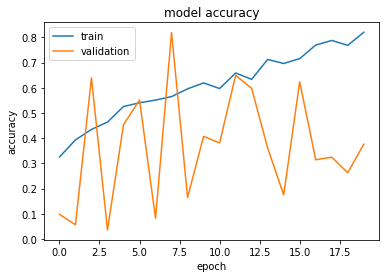

In [356]:
plt.plot(hist.history['Accuracy'])
plt.plot(hist.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

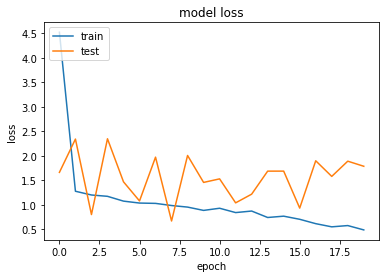

In [357]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As the number of epochs increases, we get closer to overfitting. In other words, the difference between the train accuracy and test accuracy increases. The train accuracy becomes better and the test accuracy becomes worse.
Therefore, using a higher number of epochs isn't always a good idea.
We should try different epoch sizes to prevent both underfitting and overfitting.

## Loss

In [369]:
inputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)
output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1')(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2')(output)
output = keras.layers.Dense(4, activation = "softmax")(output)
model = keras.models.Model(inputs = inputs, outputs = output)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "mean_squared_error", metrics = 
              ['Accuracy', 'Precision', 'Recall'])
hist = model.fit(x_train, y_train,batch_size=32,epochs=20,validation_data=(x_valid, y_valid));

Epoch 1/20
55/55 [==============================] - 5s 69ms/step - loss: 0.3512 - Accuracy: 0.2920 - precision: 0.2929 - recall: 0.2886 - val_loss: 0.5000 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
55/55 [==============================] - 4s 69ms/step - loss: 0.3551 - Accuracy: 0.2897 - precision: 0.2897 - recall: 0.2897 - val_loss: 0.5000 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
55/55 [==============================] - 3s 60ms/step - loss: 0.3551 - Accuracy: 0.2897 - precision: 0.2897 - recall: 0.2897 - val_loss: 0.5000 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
55/55 [==============================] - 3s 57ms/step - loss: 0.3551 - Accuracy: 0.2897 - precision: 0.2897 - recall: 0.2897 - val_loss: 0.5000 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
55/55 [==============================] - 3s 58ms/

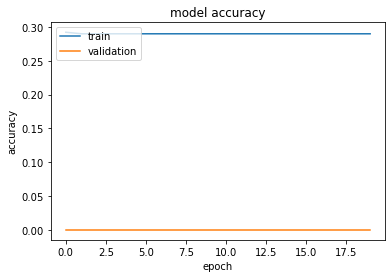

In [370]:
plt.plot(hist.history['Accuracy'])
plt.plot(hist.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

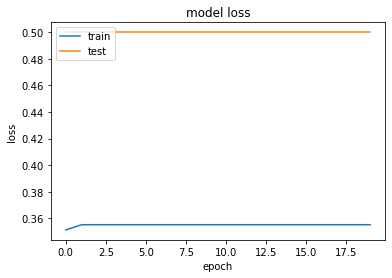

In [371]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Regularization

In [373]:
inputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)
output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1', 
                            activity_regularizer=tf.keras.regularizers.l2(0.0001))(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2',
                           activity_regularizer=tf.keras.regularizers.l2(0.0001))(output)
output = keras.layers.Dense(4, activation = "softmax",
                           activity_regularizer=tf.keras.regularizers.l2(0.0001))(output)
model = keras.models.Model(inputs = inputs, outputs = output)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = 
              ['Accuracy', 'Precision', 'Recall'])
hist = model.fit(x_train, y_train,batch_size=32,epochs=20,validation_data=(x_valid, y_valid));

Epoch 1/20
55/55 [==============================] - 5s 75ms/step - loss: 3.5704 - Accuracy: 0.3354 - precision: 0.3302 - recall: 0.1206 - val_loss: 1.8092 - val_Accuracy: 0.2010 - val_precision: 0.1429 - val_recall: 0.0361
Epoch 2/20
55/55 [==============================] - 4s 67ms/step - loss: 1.2283 - Accuracy: 0.4229 - precision: 0.6317 - recall: 0.1206 - val_loss: 2.0867 - val_Accuracy: 0.0619 - val_precision: 0.1667 - val_recall: 0.0412
Epoch 3/20
55/55 [==============================] - 3s 63ms/step - loss: 1.1481 - Accuracy: 0.4783 - precision: 0.6797 - recall: 0.1989 - val_loss: 0.9286 - val_Accuracy: 0.7268 - val_precision: 0.9730 - val_recall: 0.5567
Epoch 4/20
55/55 [==============================] - 4s 68ms/step - loss: 1.1042 - Accuracy: 0.5194 - precision: 0.6804 - recall: 0.2543 - val_loss: 1.8311 - val_Accuracy: 0.3660 - val_precision: 0.6053 - val_recall: 0.2371
Epoch 5/20
55/55 [==============================] - 3s 63ms/step - loss: 1.1006 - Accuracy: 0.5200 - precisi

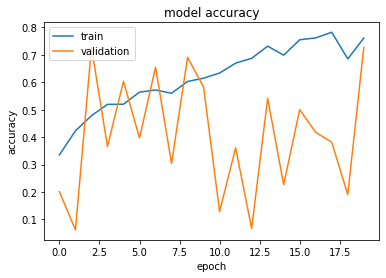

In [374]:
plt.plot(hist.history['Accuracy'])
plt.plot(hist.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

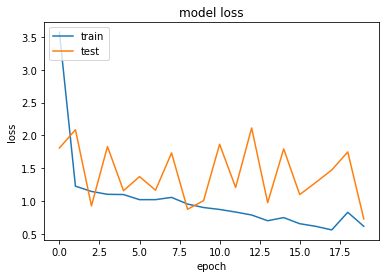

In [375]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

as we can see, it is more convergous to the train accuracy than before. it means regularizationhas made our model more accurant and our model has trained better than model without regularization.

In [384]:
inputs = keras.layers.Input(shape = (100, 100, 1), name='Input-Layer')
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
output = keras.layers.Flatten()(x)

output = keras.layers.Dense(1024, activation = "relu", name='Hidden-Layer1')(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(512, activation = "relu", name='Hidden-Layer2')(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(4, activation = "softmax")(output)
output = keras.layers.Dropout(0.1)(output)
model = keras.models.Model(inputs = inputs, outputs = output)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = 
              ['Accuracy', 'Precision', 'Recall'])
hist = model.fit(x_train, y_train,batch_size=32,epochs=20,validation_data=(x_valid, y_valid));


Epoch 1/20
 1/55 [..............................] - ETA: 32s - loss: 3.3067 - Accuracy: 0.2500 - precision: 0.2222 - recall: 0.0625

InvalidArgumentError:  assertion failed: [predictions must be <= 1] [Condition x <= y did not hold element-wise:] [x (model_100/dropout_19/dropout/Mul_1:0) = ] [[1.10909796 0.0020128889 4.11337908e-07...]...] [y (Cast_5/x:0) = ] [1]
	 [[node assert_less_equal/Assert/AssertGuard/Assert
 (defined at C:\Users\romin\anaconda3\lib\site-packages\keras\utils\metrics_utils.py:612)
]] [Op:__inference_train_function_521622]

Errors may have originated from an input operation.
Input Source operations connected to node assert_less_equal/Assert/AssertGuard/Assert:
In[0] assert_less_equal/Assert/AssertGuard/Assert/assert_less_equal/All:	
In[1] assert_less_equal/Assert/AssertGuard/Assert/data_0:	
In[2] assert_less_equal/Assert/AssertGuard/Assert/data_1:	
In[3] assert_less_equal/Assert/AssertGuard/Assert/data_2:	
In[4] assert_less_equal/Assert/AssertGuard/Assert/model_100/dropout_19/dropout/Mul_1:	
In[5] assert_less_equal/Assert/AssertGuard/Assert/data_4:	
In[6] assert_less_equal/Assert/AssertGuard/Assert/Cast_5/x:

Operation defined at: (most recent call last)
>>>   File "C:\Users\romin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\romin\AppData\Local\Temp/ipykernel_9716/2626985003.py", line 15, in <module>
>>>     hist = model.fit(x_train, y_train,batch_size=32,epochs=20,validation_data=(x_valid, y_valid));
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\engine\training.py", line 817, in train_step
>>>     self.compiled_metrics.update_state(y, y_pred, sample_weight)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 460, in update_state
>>>     metric_obj.update_state(y_t, y_p, sample_weight=mask)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 73, in decorated
>>>     update_op = update_state_fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\metrics.py", line 177, in update_state_fn
>>>     return ag_update_state(*args, **kwargs)
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\metrics.py", line 1399, in update_state
>>>     return metrics_utils.update_confusion_matrix_variables(
>>> 
>>>   File "C:\Users\romin\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 612, in update_confusion_matrix_variables
>>>     tf.compat.v1.assert_less_equal(
>>> 

Function call stack:
train_function -> assert_less_equal_Assert_AssertGuard_false_521427


# Refrences:

[1]https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a

[2]https://keras.io/api/layers/core_layers/dense/

[3]https://stackoverflow.com/questions/56226621/how-to-extract-data-labels-back-from-tensorflow-dataset

[4]https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

[5]https://stackoverflow.com/questions/70477631/batchdataset-get-img-array-and-labels